In [ ]:
EXP 5 : Z and N (combined) vs S with no scaler and no optimizer

Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.5325 - loss: 32.7834 - val_accuracy: 0.6444 - val_loss: 25.0439
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8479 - loss: 9.3410 - val_accuracy: 0.6889 - val_loss: 19.7610
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9870 - loss: 0.2060 - val_accuracy: 0.7222 - val_loss: 20.8141
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9866 - loss: 0.0747 - val_accuracy: 0.7000 - val_loss: 22.3045
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9982 - loss: 0.0181 - val_accuracy: 0.7000 - val_loss: 20.6524
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9895 - loss: 0.1158 - val_accuracy: 0.6444 - val_loss: 33.0722
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9561 - loss: 0.7053 - val_accuracy: 0.7556 - val_loss: 27.5275
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9790 - loss: 0.5159 - val_accuracy: 0.7444 - val_loss:

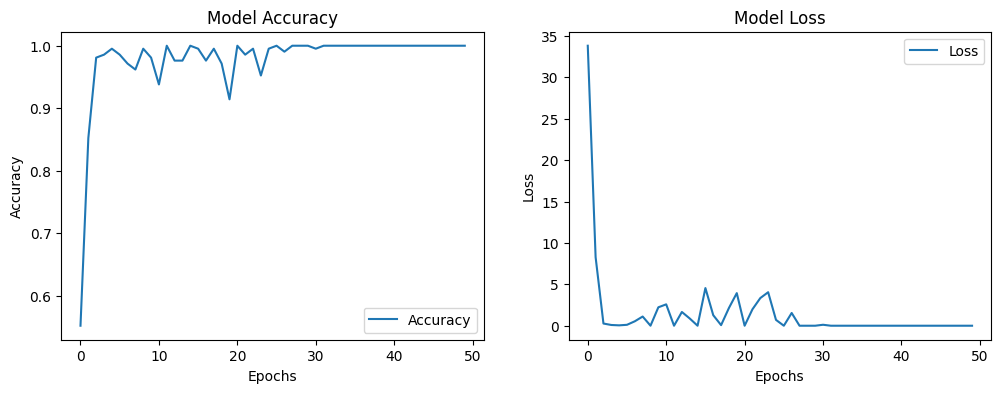

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


# Import necessary libraries
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt

# Define a function to load the data from the directories
def load_data_from_directory(directory_path, label):
    data = []
    labels = []

    # Check if the directory exists
    if not os.path.exists(directory_path):
        print(f"Error: Directory {directory_path} not found.")
        return np.array([]), np.array([])

    # List all files in the directory, including .txt and .TXT files
    files = [f for f in os.listdir(directory_path) if f.lower().endswith('.txt')]  # Case-insensitive check for .txt and .TXT files

    # If no files found, return empty arrays
    if len(files) == 0:
        print(f"No .txt files found in {directory_path}.")
        return np.array([]), np.array([])

    # Load data from each file
    for filename in files:
        file_path = os.path.join(directory_path, filename)

        try:
            file_data = np.loadtxt(file_path)
            if file_data.ndim == 1:  # If 1D data, reshape to (n_samples, 1)
                file_data = file_data.reshape(-1, 1)
            data.append(file_data)
            labels.append(label)
        except Exception as e:
            print(f"Error loading {filename}: {e}")

    # Convert to numpy arrays
    data = np.array(data, dtype=object)
    labels = np.array(labels)

    return data, labels

# Paths to your datasets (Z and N combined vs S)
path_Z = '/content/drive/My Drive/PFA2_DataSet/DataSet/Healthy/Z'  # Healthy (Z)
path_N = '/content/drive/My Drive/PFA2_DataSet/DataSet/Elipy/N'  # Epileptic (N)
path_S = '/content/drive/My Drive/PFA2_DataSet/DataSet/Seizeur/S'  # Seizeur (S)

# Step 1: Load data from the directories (Z and N vs S)
data_Z, labels_Z = load_data_from_directory(path_Z, label=1)  # Healthy (Z)
data_N, labels_N = load_data_from_directory(path_N, label=1)  # Epileptic (N)
data_S, labels_S = load_data_from_directory(path_S, label=0)  # Seizeur (S)

# Step 2: Concatenate data and labels from the three classes (Z and N vs S)
if data_Z.size > 0 and data_N.size > 0 and data_S.size > 0:
    data_all = np.concatenate((data_Z, data_N, data_S), axis=0)
    labels_all = np.concatenate((labels_Z, labels_N, labels_S), axis=0)

    # Flatten data arrays into 2D arrays if necessary
    data_all = [d.flatten() for d in data_all]  # Flatten each sample
    data_all = np.array(data_all)

    # Ensure the data is of type float32
    data_all = data_all.astype(np.float32)

    # Step 3: One-hot encode the labels for Softmax activation (2 classes: Z and N as same label vs S)
    labels_all = to_categorical(labels_all, num_classes=2)  # One-hot encoding for 2 classes (Non-Healthy and Seizeur)

    # Step 4: Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(data_all, labels_all, test_size=0.3, random_state=42)

    # Step 5: Define the ANN model with Softmax in the output layer (2 classes)
    model = Sequential([
        Dense(512, input_dim=X_train.shape[1], activation='relu'),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(2, activation='softmax')  # Output layer for 2 classes (Non-Healthy and Seizeur)
    ])

    # Step 6: Compile the model with no optimizer (default)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Step 7: Train the model and show training progress
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

    # Step 8: Evaluate the model on the test set
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)  # Get the index of the class with the highest probability

    # Step 9: Calculate evaluation metrics
    accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred_classes)
    recall = recall_score(np.argmax(y_test, axis=1), y_pred_classes, average='macro')
    precision = precision_score(np.argmax(y_test, axis=1), y_pred_classes, average='macro')
    conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)

    # Step 10: Print evaluation metrics
    print("Accuracy: ", accuracy)
    print("Recall: ", recall)
    print("Precision: ", precision)
    print("Confusion Matrix: \n", conf_matrix)

    # Step 11: Plot Training History
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

else:
    print("Error: Data loading failed. Ensure the files are present in the directories.")


with StandardScaler

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.7618 - loss: 0.5372 - val_accuracy: 0.9556 - val_loss: 0.2003
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 1.0000 - loss: 0.0221 - val_accuracy: 0.9444 - val_loss: 0.4355
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.9000 - val_loss: 1.0250
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 1.0000 - loss: 2.5259e-04 - val_accuracy: 0.8889 - val_loss: 1.2949
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 1.0000 - loss: 9.0093e-06 - val_accuracy: 0.8889 - val_loss: 1.3692
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 1.0000 - loss: 5.9802e-06 - val_accuracy: 0.8889 - val_loss: 1.4073
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 1.0000 - loss: 3.3288e-06 - val_accuracy: 0.8889 - val_loss: 1.4281
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 1.0000 - loss: 2.9323e-06 - val_accuracy: 0.9000 - val_loss

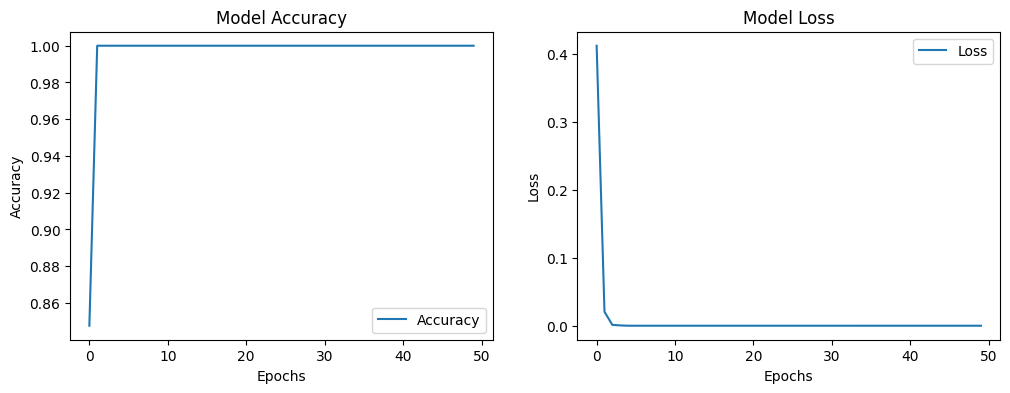

In [ ]:
# Import necessary libraries
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt

# Define a function to load the data from the directories
def load_data_from_directory(directory_path, label):
    data = []
    labels = []

    # Check if the directory exists
    if not os.path.exists(directory_path):
        print(f"Error: Directory {directory_path} not found.")
        return np.array([]), np.array([])

    # List all files in the directory, including .txt and .TXT files
    files = [f for f in os.listdir(directory_path) if f.lower().endswith('.txt')]  # Case-insensitive check for .txt and .TXT files

    # If no files found, return empty arrays
    if len(files) == 0:
        print(f"No .txt files found in {directory_path}.")
        return np.array([]), np.array([])

    # Load data from each file
    for filename in files:
        file_path = os.path.join(directory_path, filename)

        try:
            file_data = np.loadtxt(file_path)
            if file_data.ndim == 1:  # If 1D data, reshape to (n_samples, 1)
                file_data = file_data.reshape(-1, 1)
            data.append(file_data)
            labels.append(label)
        except Exception as e:
            print(f"Error loading {filename}: {e}")

    # Convert to numpy arrays
    data = np.array(data, dtype=object)
    labels = np.array(labels)

    return data, labels

# Paths to your datasets (Z and N combined vs S)
path_Z = '/content/drive/My Drive/PFA2_DataSet/DataSet/Healthy/Z'  # Healthy (Z)
path_N = '/content/drive/My Drive/PFA2_DataSet/DataSet/Elipy/N'  # Epileptic (N)
path_S = '/content/drive/My Drive/PFA2_DataSet/DataSet/Seizeur/S'  # Seizeur (S)

# Step 1: Load data from the directories (Z and N vs S)
data_Z, labels_Z = load_data_from_directory(path_Z, label=1)  # Healthy (Z)
data_N, labels_N = load_data_from_directory(path_N, label=1)  # Epileptic (N)
data_S, labels_S = load_data_from_directory(path_S, label=0)  # Seizeur (S)

# Step 2: Concatenate data and labels from the three classes (Z and N vs S)
if data_Z.size > 0 and data_N.size > 0 and data_S.size > 0:
    data_all = np.concatenate((data_Z, data_N, data_S), axis=0)
    labels_all = np.concatenate((labels_Z, labels_N, labels_S), axis=0)

    # Flatten data arrays into 2D arrays if necessary
    data_all = [d.flatten() for d in data_all]  # Flatten each sample
    data_all = np.array(data_all)

    # Ensure the data is of type float32
    data_all = data_all.astype(np.float32)

    # Step 3: One-hot encode the labels for Softmax activation (2 classes: Z and N as same label vs S)
    labels_all = to_categorical(labels_all, num_classes=2)  # One-hot encoding for 2 classes (Non-Healthy and Seizeur)

    # Step 4: Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(data_all, labels_all, test_size=0.3, random_state=42)

    # Step 5: Apply StandardScaler to scale the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Step 6: Define the ANN model with Softmax in the output layer (2 classes)
    model = Sequential([
        Dense(512, input_dim=X_train_scaled.shape[1], activation='relu'),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(2, activation='softmax')  # Output layer for 2 classes (Non-Healthy and Seizeur)
    ])

    # Step 7: Compile the model with default optimizer ('adam')
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Step 8: Train the model and show training progress
    history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=1)

    # Step 9: Evaluate the model on the test set
    y_pred = model.predict(X_test_scaled)
    y_pred_classes = np.argmax(y_pred, axis=1)  # Get the index of the class with the highest probability

    # Step 10: Calculate evaluation metrics
    accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred_classes)
    recall = recall_score(np.argmax(y_test, axis=1), y_pred_classes, average='macro')
    precision = precision_score(np.argmax(y_test, axis=1), y_pred_classes, average='macro')
    conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)

    # Step 11: Print evaluation metrics
    print("Accuracy: ", accuracy)
    print("Recall: ", recall)
    print("Precision: ", precision)
    print("Confusion Matrix: \n", conf_matrix)

    # Step 12: Plot Training History
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

else:
    print("Error: Data loading failed. Ensure the files are present in the directories.")


with the optimizer (Adam)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - accuracy: 0.4574 - loss: 44.7888 - val_accuracy: 0.6667 - val_loss: 42.0279
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.9216 - loss: 9.0473 - val_accuracy: 0.6556 - val_loss: 36.1379
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.9317 - loss: 2.7243 - val_accuracy: 0.7444 - val_loss: 18.7268
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9640 - loss: 8.4380 - val_accuracy: 0.7111 - val_loss: 25.1836
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9880 - loss: 0.4039 - val_accuracy: 0.7111 - val_loss: 40.7600
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.9952 - loss: 0.5609 - val_accuracy: 0.6111 - val_loss: 49.6159
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.9629 - loss: 0.5605 - val_accuracy: 0.7222 - val_loss: 57.4353
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9931 - loss: 0.0144 - val_accuracy: 0.7111 - val_loss

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Accuracy:  0.7
Recall:  0.753968253968254
Precision:  0.7142857142857143
Confusion Matrix: 
 [[24  3]
 [24 39]]


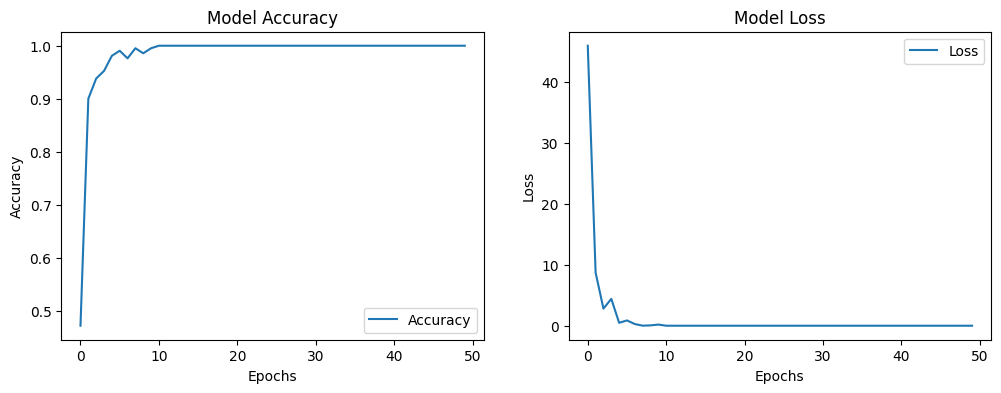

In [ ]:
# Import necessary libraries
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt

# Define a function to load the data from the directories
def load_data_from_directory(directory_path, label):
    data = []
    labels = []

    # Check if the directory exists
    if not os.path.exists(directory_path):
        print(f"Error: Directory {directory_path} not found.")
        return np.array([]), np.array([])

    # List all files in the directory, including .txt and .TXT files
    files = [f for f in os.listdir(directory_path) if f.lower().endswith('.txt')]  # Case-insensitive check for .txt and .TXT files

    # If no files found, return empty arrays
    if len(files) == 0:
        print(f"No .txt files found in {directory_path}.")
        return np.array([]), np.array([])

    # Load data from each file
    for filename in files:
        file_path = os.path.join(directory_path, filename)

        try:
            file_data = np.loadtxt(file_path)
            if file_data.ndim == 1:  # If 1D data, reshape to (n_samples, 1)
                file_data = file_data.reshape(-1, 1)
            data.append(file_data)
            labels.append(label)
        except Exception as e:
            print(f"Error loading {filename}: {e}")

    # Convert to numpy arrays
    data = np.array(data, dtype=object)
    labels = np.array(labels)

    return data, labels

# Paths to your datasets (Z and N combined vs S)
path_Z = '/content/drive/My Drive/PFA2_DataSet/DataSet/Healthy/Z'  # Healthy (Z)
path_N = '/content/drive/My Drive/PFA2_DataSet/DataSet/Elipy/N'  # Epileptic (N)
path_S = '/content/drive/My Drive/PFA2_DataSet/DataSet/Seizeur/S'  # Seizeur (S)

# Step 1: Load data from the directories (Z and N vs S)
data_Z, labels_Z = load_data_from_directory(path_Z, label=1)  # Healthy (Z)
data_N, labels_N = load_data_from_directory(path_N, label=1)  # Epileptic (N)
data_S, labels_S = load_data_from_directory(path_S, label=0)  # Seizeur (S)

# Step 2: Concatenate data and labels from the three classes (Z and N vs S)
if data_Z.size > 0 and data_N.size > 0 and data_S.size > 0:
    data_all = np.concatenate((data_Z, data_N, data_S), axis=0)
    labels_all = np.concatenate((labels_Z, labels_N, labels_S), axis=0)

    # Flatten data arrays into 2D arrays if necessary
    data_all = [d.flatten() for d in data_all]  # Flatten each sample
    data_all = np.array(data_all)

    # Ensure the data is of type float32
    data_all = data_all.astype(np.float32)

    # Step 3: One-hot encode the labels for Softmax activation (2 classes: Z and N as same label vs S)
    labels_all = to_categorical(labels_all, num_classes=2)  # One-hot encoding for 2 classes (Non-Healthy and Seizeur)

    # Step 4: Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(data_all, labels_all, test_size=0.3, random_state=42)

    # Step 5: Define the ANN model with Softmax in the output layer (2 classes)
    model = Sequential([
        Dense(512, input_dim=X_train.shape[1], activation='relu'),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(2, activation='softmax')  # Output layer for 2 classes (Non-Healthy and Seizeur)
    ])

    # Step 6: Compile the model with Adam optimizer
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Step 7: Train the model and show training progress
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

    # Step 8: Evaluate the model on the test set
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)  # Get the index of the class with the highest probability

    # Step 9: Calculate evaluation metrics
    accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred_classes)
    recall = recall_score(np.argmax(y_test, axis=1), y_pred_classes, average='macro')
    precision = precision_score(np.argmax(y_test, axis=1), y_pred_classes, average='macro')
    conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)

    # Step 10: Print evaluation metrics
    print("Accuracy: ", accuracy)
    print("Recall: ", recall)
    print("Precision: ", precision)
    print("Confusion Matrix: \n", conf_matrix)

    # Step 11: Plot Training History
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

else:
    print("Error: Data loading failed. Ensure the files are present in the directories.")


with optimizer and standerscaler

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.6621 - loss: 0.5317 - val_accuracy: 0.9889 - val_loss: 0.1445
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 0.0521 - val_accuracy: 0.9667 - val_loss: 0.2048
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.9667 - val_loss: 0.4393
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 1.3129e-04 - val_accuracy: 0.9667 - val_loss: 0.5553
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 1.0000 - loss: 2.7824e-05 - val_accuracy: 0.9667 - val_loss: 0.6082
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 9.0776e-06 - val_accuracy: 0.9667 - val_loss: 0.6330
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 1.0000 - loss: 6.6708e-06 - val_accuracy: 0.9667 - val_loss: 0.6442
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 4.6002e-06 - val_accuracy: 0.9667 - val_loss

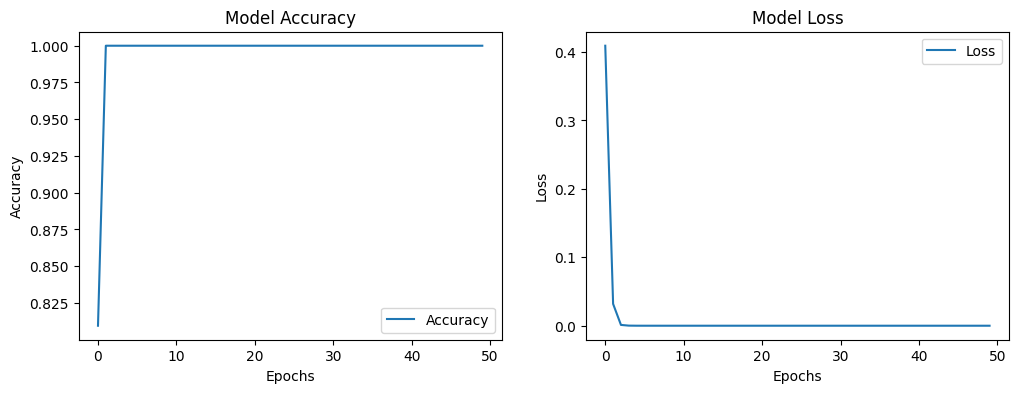

In [ ]:
# Import necessary libraries
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt

# Define a function to load the data from the directories
def load_data_from_directory(directory_path, label):
    data = []
    labels = []

    # Check if the directory exists
    if not os.path.exists(directory_path):
        print(f"Error: Directory {directory_path} not found.")
        return np.array([]), np.array([])

    # List all files in the directory, including .txt and .TXT files
    files = [f for f in os.listdir(directory_path) if f.lower().endswith('.txt')]  # Case-insensitive check for .txt and .TXT files

    # If no files found, return empty arrays
    if len(files) == 0:
        print(f"No .txt files found in {directory_path}.")
        return np.array([]), np.array([])

    # Load data from each file
    for filename in files:
        file_path = os.path.join(directory_path, filename)

        try:
            file_data = np.loadtxt(file_path)
            if file_data.ndim == 1:  # If 1D data, reshape to (n_samples, 1)
                file_data = file_data.reshape(-1, 1)
            data.append(file_data)
            labels.append(label)
        except Exception as e:
            print(f"Error loading {filename}: {e}")

    # Convert to numpy arrays
    data = np.array(data, dtype=object)
    labels = np.array(labels)

    return data, labels

# Paths to your datasets (Z and N combined vs S)
path_Z = '/content/drive/My Drive/PFA2_DataSet/DataSet/Healthy/Z'  # Healthy (Z)
path_N = '/content/drive/My Drive/PFA2_DataSet/DataSet/Elipy/N'  # Epileptic (N)
path_S = '/content/drive/My Drive/PFA2_DataSet/DataSet/Seizeur/S'  # Seizeur (S)

# Step 1: Load data from the directories (Z and N vs S)
data_Z, labels_Z = load_data_from_directory(path_Z, label=1)  # Healthy (Z)
data_N, labels_N = load_data_from_directory(path_N, label=1)  # Epileptic (N)
data_S, labels_S = load_data_from_directory(path_S, label=0)  # Seizeur (S)

# Step 2: Concatenate data and labels from the three classes (Z and N vs S)
if data_Z.size > 0 and data_N.size > 0 and data_S.size > 0:
    data_all = np.concatenate((data_Z, data_N, data_S), axis=0)
    labels_all = np.concatenate((labels_Z, labels_N, labels_S), axis=0)

    # Flatten data arrays into 2D arrays if necessary
    data_all = [d.flatten() for d in data_all]  # Flatten each sample
    data_all = np.array(data_all)

    # Ensure the data is of type float32
    data_all = data_all.astype(np.float32)

    # Step 3: StandardScaler - Scale the data
    scaler = StandardScaler()
    data_all = scaler.fit_transform(data_all)  # Standardize the features (zero mean, unit variance)

    # Step 4: One-hot encode the labels for Softmax activation (2 classes: Z and N as same label vs S)
    labels_all = to_categorical(labels_all, num_classes=2)  # One-hot encoding for 2 classes (Non-Healthy and Seizeur)

    # Step 5: Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(data_all, labels_all, test_size=0.3, random_state=42)

    # Step 6: Define the ANN model with Softmax in the output layer (2 classes)
    model = Sequential([
        Dense(512, input_dim=X_train.shape[1], activation='relu'),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(2, activation='softmax')  # Output layer for 2 classes (Non-Healthy and Seizeur)
    ])

    # Step 7: Compile the model with Adam optimizer
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Step 8: Train the model and show training progress
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

    # Step 9: Evaluate the model on the test set
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)  # Get the index of the class with the highest probability

    # Step 10: Calculate evaluation metrics
    accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred_classes)
    recall = recall_score(np.argmax(y_test, axis=1), y_pred_classes, average='macro')
    precision = precision_score(np.argmax(y_test, axis=1), y_pred_classes, average='macro')
    conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)

    # Step 11: Print evaluation metrics
    print("Accuracy: ", accuracy)
    print("Recall: ", recall)
    print("Precision: ", precision)
    print("Confusion Matrix: \n", conf_matrix)

    # Step 12: Plot Training History
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

else:
    print("Error: Data loading failed. Ensure the files are present in the directories.")
